In [1]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/55/d5/0a1c65b13ab5a24178d162d0cfd3f8a709588388cc5bdd32b17c119f6d54/shap-0.44.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 10.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/76/e8/260752c1bc8dc856b27cfefaa3fca29ba02a15f649bbf6e9c15ed54e5480/xgboost-2.0.2-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing packages
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests                                      # reading data
from io import StringIO

from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import zero_one_loss as J01
from sklearn.preprocessing import OneHotEncoder
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

import sklearn.tree as tree

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

In [32]:
pip install --upgrade imbalanced-learn scikit-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/40/c6/2e91eefb757822e70d351e02cc38d07c137212ae7c41ac12746415b4860a/scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 15.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need

In [97]:
Xtr = pd.read_csv("data/X_TRAINING_SET_Diabetes_ENCODED.csv")
Ytr = pd.read_csv("data/Y_TRAINING_SET.csv")
Xtr = Xtr.drop(columns=['Unnamed: 0','index'])
                 
Xtest = pd.read_csv("data/X_VALIDATION_SET_ENCODED.csv")
Ytest = pd.read_csv("data/Y_VALIDATION_SET.csv")
Xtest = Xtest.drop(columns=['Unnamed: 0'])



In [1]:
from imblearn.combine import SMOTEENN


In [98]:
Ytr['readmitted'] = Ytr['readmitted'].map({'<30': 1, 'NO': 0, '>30': 2})
Ytest['readmitted'] = Ytest ['readmitted'].map({'<30': 1, 'NO': 0, '>30': 2})


In [99]:
Ytr=Ytr.iloc[:,1:]

In [100]:
sme = SMOTEENN(random_state=42)
X_tr_bal, y_tr_bal = sme.fit_resample(Xtr, Ytr)

In [101]:
y_tr_bal.to_csv('data/Y_TRAINING_SET_EDIT.csv', index=False)
Ytest.to_csv('data/Y_VALIDATION_SET_EDIT.csv', index=False)

In [102]:
from sklearn.ensemble import AdaBoostClassifier


cls = AdaBoostClassifier()

cls.fit(X_tr_bal, y_tr_bal)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


AdaBoostClassifier()

In [103]:
y_tr_bal.shape

(28124, 1)

Top 5 Features:
gender_Male: 0.1200
patient_nbr: 0.1000
gender_Female: 0.1000
number_inpatient: 0.0800
change_No: 0.0800


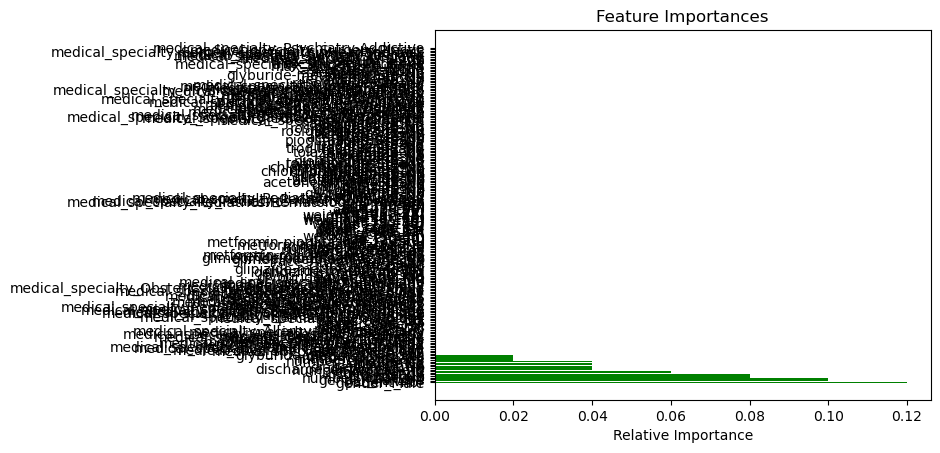

In [104]:
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1]  # Reverse the order to get descending importance
features = Xtr.columns

n = 5  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

# Plot the bar chart
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Top 25 Features:
gender_Male: 0.1200
patient_nbr: 0.1000
gender_Female: 0.1000
number_inpatient: 0.0800
change_No: 0.0800
change_Ch: 0.0800
insulin_Steady: 0.0600
encounter_id: 0.0600
number_outpatient: 0.0400
discharge_disposition_id: 0.0400
diabetesMed_No: 0.0400
insulin_Down: 0.0400
insulin_No: 0.0400
insulin_Up: 0.0400
number_emergency: 0.0200
number_diagnoses: 0.0200
metformin_Steady: 0.0200
diabetesMed_Yes: 0.0200
glyburide-metformin_Down: 0.0000
payer_code_MD: 0.0000
medical_specialty_Gynecology: 0.0000
medical_specialty_Gastroenterology: 0.0000
medical_specialty_Family/GeneralPractice: 0.0000
medical_specialty_Endocrinology-Metabolism: 0.0000
medical_specialty_Endocrinology: 0.0000


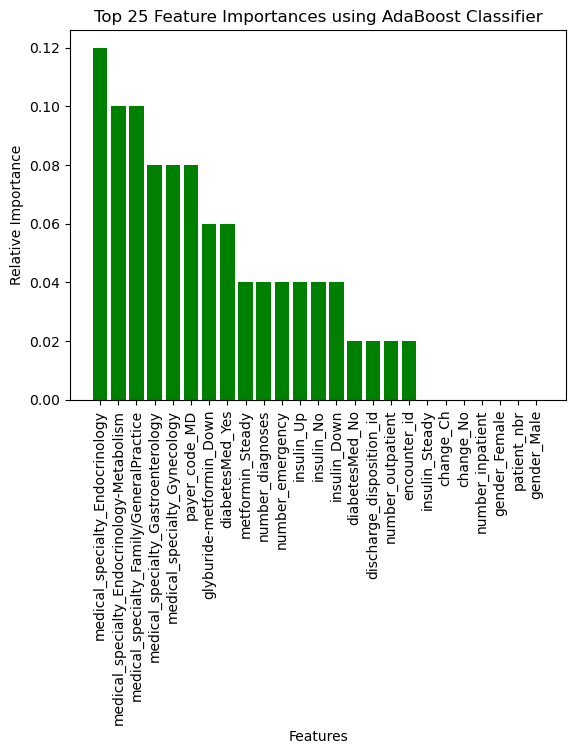

In [105]:
n = 25  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')
plt.title(f'Top {n} Feature Importances using AdaBoost Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), [features[i] for i in top_n_indices[::-1]], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()

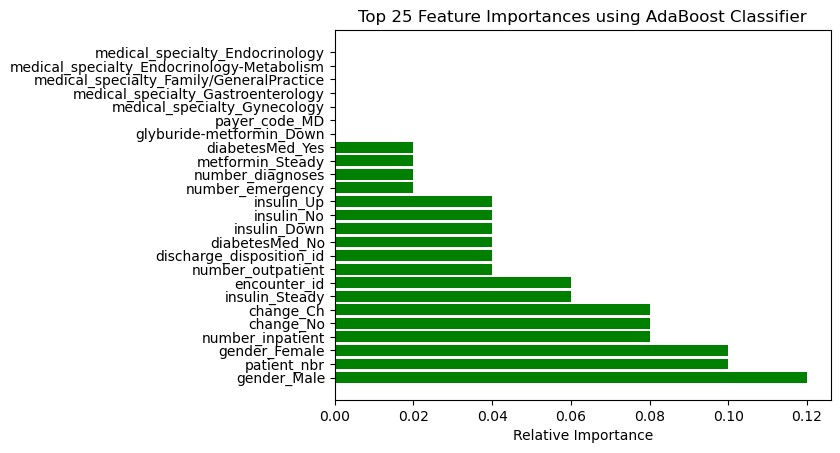

In [106]:
# Plot the bar chart for the top n importances
plt.title(f'Top {n} Feature Importances using AdaBoost Classifier')
plt.barh(range(len(top_n_indices)), top_n_importances, color='g', align='center')
plt.yticks(range(len(top_n_indices)), [features[i] for i in top_n_indices])
plt.xlabel('Relative Importance')
plt.show()


In [107]:
# Select only the top n features in Xtr
Xtr_top_n_adaboost = X_tr_bal[top_n_features]



In [108]:
Xtr_top_n_adaboost

,gender_Male,patient_nbr,gender_Female,number_inpatient,change_No,change_Ch,insulin_Steady,encounter_id,number_outpatient,discharge_disposition_id,...,number_diagnoses,metformin_Steady,diabetesMed_Yes,glyburide-metformin_Down,payer_code_MD,medical_specialty_Gynecology,medical_specialty_Gastroenterology,medical_specialty_Family/GeneralPractice,medical_specialty_Endocrinology-Metabolism,medical_specialty_Endocrinology
0,0,3.850798e+07,1,0.000000,1,0,0,3.913462e+08,0.000000,1.000000,...,9.000000,0,0,0,0,0,0,0,0,0
1,1,2.491020e+06,0,1.000000,1,0,0,4.623627e+07,0.000000,18.000000,...,7.000000,0,0,0,0,0,0,0,0,0
2,0,2.361438e+06,1,0.000000,1,0,1,1.648744e+08,0.000000,1.000000,...,9.000000,0,1,0,0,0,0,0,0,0
3,0,5.997803e+07,1,1.000000,0,1,0,1.863884e+08,0.000000,3.000000,...,9.000000,0,1,0,0,0,0,0,0,0
4,0,4.151916e+06,1,0.000000,1,0,0,1.920240e+07,0.000000,1.000000,...,6.000000,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,0,5.659423e+07,1,0.000000,0,0,0,1.076482e+08,3.506860,2.253430,...,9.000000,0,1,0,0,0,0,0,0,0
28120,1,1.142126e+07,0,1.763230,0,0,0,1.795524e+08,0.000000,1.000000,...,9.000000,0,0,0,0,0,0,0,0,0
28121,0,2.775029e+05,0,0.000000,0,0,0,2.875671e+06,0.000000,25.000000,...,4.450472,0,1,0,0,0,0,0,0,0
28122,0,4.314942e+07,1,0.551484,0,1,0,1.725120e+08,0.000000,1.000000,...,5.654453,0,1,0,0,0,0,0,0,0


In [23]:
Xtr_top_n_adaboost.to_csv('/users/abhinandganesh/Desktop/Xtr_Feature_Selected.csv')


# Random Forest

In [109]:

cls=RandomForestClassifier()

In [110]:
X_tr_bal.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient',
       ...
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=212)

In [111]:
cls.fit(X_tr_bal, y_tr_bal)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier()

Top 5 Features:
patient_nbr: 0.0831
encounter_id: 0.0740
number_inpatient: 0.0599
num_medications: 0.0554
num_lab_procedures: 0.0551


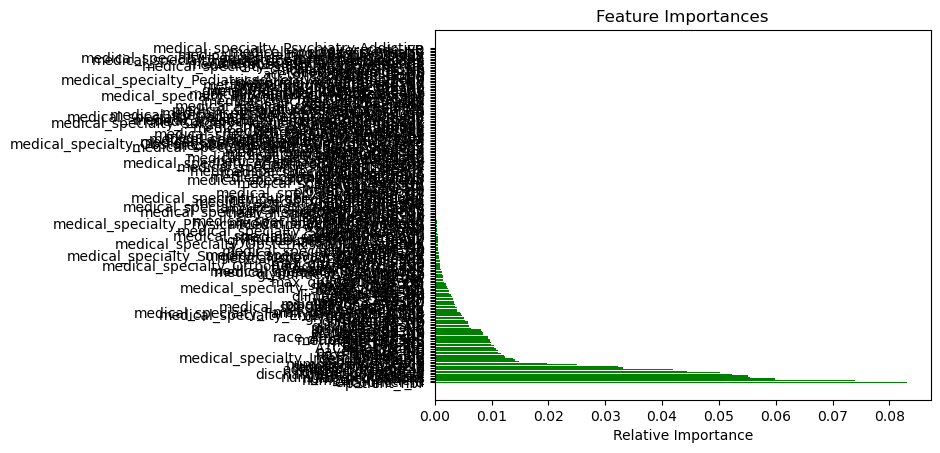

In [112]:
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1]  # Reverse the order to get descending importance
features = Xtr.columns

n = 5  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

# Plot the bar chart
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Top 25 Features:
patient_nbr: 0.0831
encounter_id: 0.0740
number_inpatient: 0.0599
num_medications: 0.0554
num_lab_procedures: 0.0551
time_in_hospital: 0.0523
discharge_disposition_id: 0.0501
number_diagnoses: 0.0444
num_procedures: 0.0419
admission_source_id: 0.0331
admission_type_id: 0.0323
number_outpatient: 0.0251
number_emergency: 0.0198
insulin_Steady: 0.0148
gender_Male: 0.0141
gender_Female: 0.0138
medical_specialty_InternalMedicine: 0.0124
insulin_No: 0.0123
race_Caucasian: 0.0117
change_No: 0.0111
payer_code_MC: 0.0111
age_[70-80): 0.0108
A1Cresult_None: 0.0104
change_Ch: 0.0104
age_[60-70): 0.0099


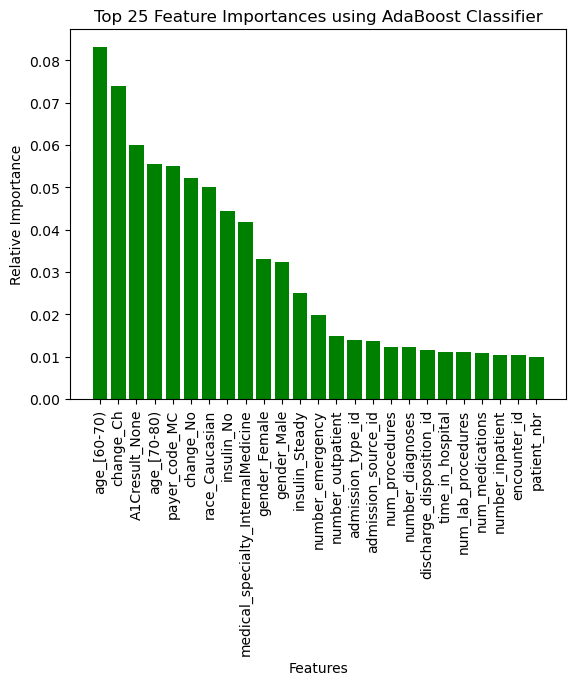

In [113]:
n = 25  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')
plt.title(f'Top {n} Feature Importances using AdaBoost Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), [features[i] for i in top_n_indices[::-1]], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()


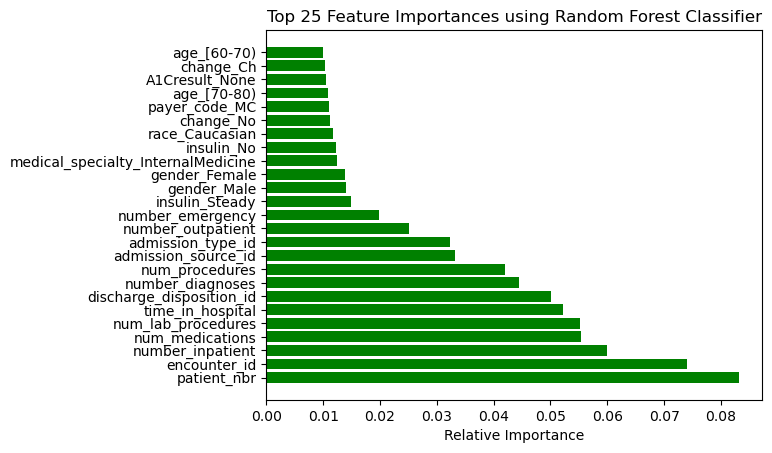

In [114]:
# Plot the bar chart for the top n importances
plt.title(f'Top {n} Feature Importances using Random Forest Classifier')
plt.barh(range(len(top_n_indices)), top_n_importances, color='g', align='center')
plt.yticks(range(len(top_n_indices)), [features[i] for i in top_n_indices])
plt.xlabel('Relative Importance')
plt.show()


In [115]:
Xtr_top_n_rf = X_tr_bal[top_n_features]


In [43]:
Xtr_top_n_rf.to_csv('/users/abhinandganesh/Desktop/Xtr_Feature_Selected_rf.csv')


In [93]:
Xtr_top_n_rf.columns

Index(['patient_nbr', 'index', 'encounter_id', 'number_inpatient',
       'num_medications', 'num_lab_procedures', 'time_in_hospital',
       'discharge_disposition_id', 'number_diagnoses', 'num_procedures',
       'admission_type_id', 'admission_source_id', 'number_outpatient',
       'number_emergency', 'insulin_Steady', 'gender_Male', 'gender_Female',
       'insulin_No', 'medical_specialty_InternalMedicine', 'race_Caucasian',
       'change_No', 'age_[70-80)', 'change_Ch', 'payer_code_MC',
       'A1Cresult_None'],
      dtype='object')

In [94]:
Xtr_top_n_adaboost.columns

Index(['gender_Male', 'gender_Female', 'patient_nbr', 'number_inpatient',
       'change_No', 'change_Ch', 'insulin_Steady', 'number_outpatient',
       'insulin_No', 'discharge_disposition_id', 'diabetesMed_No',
       'insulin_Down', 'insulin_Up', 'index', 'number_emergency',
       'number_diagnoses', 'encounter_id', 'metformin_Steady',
       'diabetesMed_Yes', 'glyburide-metformin_Down', 'payer_code_MC',
       'medical_specialty_Gastroenterology',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Endocrinology-Metabolism',
       'medical_specialty_Endocrinology'],
      dtype='object')

In [95]:
Xtr_top_n_xgb.columns

Index(['number_inpatient', 'change_Ch', 'insulin_No', 'change_No',
       'insulin_Down', 'diabetesMed_Yes', 'gender_Female', 'insulin_Steady',
       'discharge_disposition_id', 'insulin_Up', 'gender_Male', 'encounter_id',
       'age__80-90)', 'age__70-80)', 'medical_specialty_Emergency/Trauma',
       'diabetesMed_No', 'age__40-50)', 'patient_nbr', 'age__50-60)',
       'age__30-40)', 'number_outpatient', 'metformin_Steady',
       'number_emergency', 'index', 'race_Asian'],
      dtype='object')

In [85]:
common_columns = list(set(Xtr_top_n_rf.columns) & set(Xtr_top_n_adaboost.columns) & set(Xtr_top_n_xgb.columns))


In [96]:
common_columns

['change_No',
 'change_Ch',
 'number_emergency',
 'patient_nbr',
 'gender_Male',
 'number_outpatient',
 'gender_Female',
 'insulin_Steady',
 'discharge_disposition_id',
 'number_inpatient',
 'insulin_No',
 'encounter_id',
 'index']

In [89]:
common_columns = list(set(Xtr_top_n_rf.columns) & set(Xtr_top_n_adaboost.columns) & set(Xtr_top_n_xgb.columns))

# Create a dataset with common columns
common_dataset = X_tr_bal[common_columns]



In [90]:
common_dataset

,change_No,change_Ch,number_emergency,patient_nbr,gender_Male,number_outpatient,gender_Female,insulin_Steady,discharge_disposition_id,number_inpatient,insulin_No,encounter_id,index
0,1,0,0.000000,3.850798e+07,0,0.000000,1,0,1.000000,0.000000,1,3.913462e+08,97653
1,1,0,0.000000,2.491020e+06,1,0.000000,0,0,18.000000,1.000000,1,4.623627e+07,11090
2,1,0,0.000000,2.361438e+06,0,0.000000,1,1,1.000000,0.000000,0,1.648744e+08,58004
3,0,1,0.000000,5.997803e+07,0,0.000000,1,0,3.000000,1.000000,1,1.863884e+08,66644
4,1,0,0.000000,4.151916e+06,0,0.000000,1,0,1.000000,0.000000,1,1.920240e+07,3013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,0,0,1.119855,5.659423e+07,0,3.506860,1,0,2.253430,0.000000,0,1.076482e+08,34375
28120,0,0,0.000000,1.142126e+07,1,0.000000,0,0,1.000000,1.763230,0,1.795524e+08,64528
28121,0,0,0.000000,2.775029e+05,0,0.000000,0,0,25.000000,0.000000,0,2.875671e+06,250
28122,0,1,0.000000,4.314942e+07,0,0.000000,1,0,1.000000,0.551484,0,1.725120e+08,61863


In [91]:
common_dataset.to_csv('data/XTR_SMOTEEN+FEATURE_SELECTION.csv')

In [92]:
y_tr_bal.to_csv('data/YTR_SMOTEEN_FEATURE_SELECTION.csv')

# XGBoost

In [118]:
cls=XGBClassifier()
cls.fit(X_tr_bal,y_tr_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Top 25 Features:
number_inpatient: 0.0527
change_No: 0.0445
change_Ch: 0.0317
diabetesMed_Yes: 0.0301
insulin_No: 0.0283
gender_Female: 0.0236
insulin_Up: 0.0229
insulin_Steady: 0.0214
metformin_Up: 0.0206
discharge_disposition_id: 0.0191
diabetesMed_No: 0.0166
gender_Male: 0.0162
age__80-90): 0.0146
glipizide_Up: 0.0146
medical_specialty_Emergency/Trauma: 0.0144
race_Asian: 0.0140
age__50-60): 0.0138
insulin_Down: 0.0133
patient_nbr: 0.0131
encounter_id: 0.0124
number_outpatient: 0.0124
age__40-50): 0.0116
metformin_Steady: 0.0110
age__70-80): 0.0110
number_emergency: 0.0109


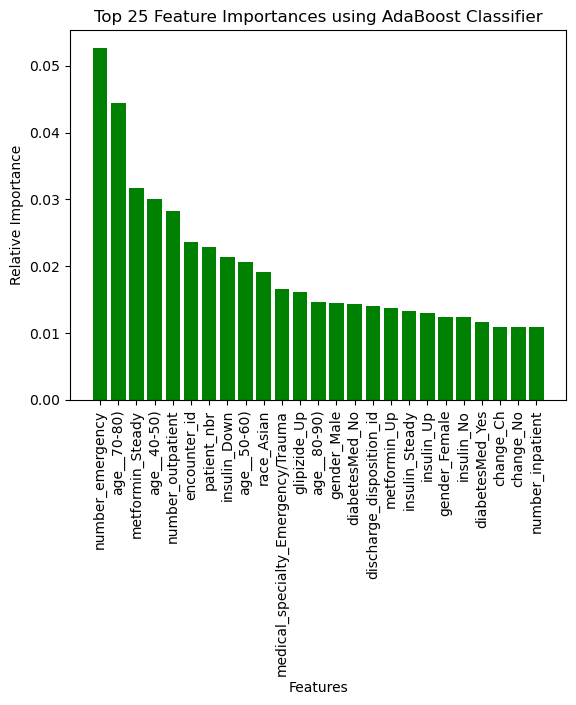

In [121]:
n = 25  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')
plt.title(f'Top {n} Feature Importances using AdaBoost Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), [features[i] for i in top_n_indices[::-1]], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()


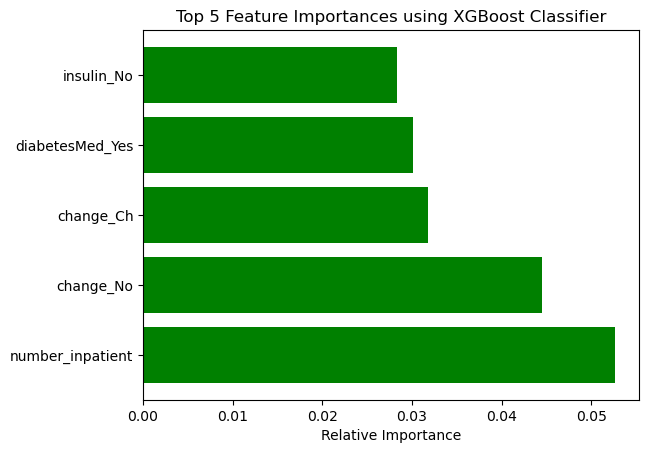

In [120]:
# Plot the bar chart for the top n importances
plt.title(f'Top {n} Feature Importances using XGBoost Classifier')
plt.barh(range(len(top_n_indices)), top_n_importances, color='g', align='center')
plt.yticks(range(len(top_n_indices)), [features[i] for i in top_n_indices])
plt.xlabel('Relative Importance')
plt.show()

In [71]:
n = 25  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')
plt.title(f'Top {n} Feature Importances using AdaBoost Classifier')
plt.bar(range(len(top_n_indices)-1, -1, -1), top_n_importances[::-1], color='g', align='center')
plt.xticks(range(len(top_n_indices)), [features[i] for i in top_n_indices[::-1]], rotation='vertical')
plt.ylabel('Relative Importance')
plt.xlabel('Features')
plt.show()

Top 25 Features:
number_inpatient: 0.0516
change_Ch: 0.0367
insulin_No: 0.0303
change_No: 0.0299
insulin_Down: 0.0288
diabetesMed_Yes: 0.0241
gender_Female: 0.0238
insulin_Steady: 0.0206
discharge_disposition_id: 0.0195
insulin_Up: 0.0193
gender_Male: 0.0192
encounter_id: 0.0187
age__80-90): 0.0152
age__70-80): 0.0148
medical_specialty_Emergency/Trauma: 0.0142
diabetesMed_No: 0.0136
age__40-50): 0.0133
patient_nbr: 0.0132
age__50-60): 0.0126
age__30-40): 0.0125
number_outpatient: 0.0119
metformin_Steady: 0.0116
number_emergency: 0.0116
index: 0.0116
race_Asian: 0.0113


In [72]:
Xtr_top_n_xgb = X_tr_bal[top_n_features]


In [73]:
Xtr_top_n_xgb.to_csv('/users/abhinandganesh/Desktop/Xtr_Feature_Selected_xgb.csv')


# Voting Classifier

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = XGBClassifier()
model2 = RandomForestClassifier()
model3 = AdaBoostClassifier()
model4 = LinearDiscriminantAnalysis()

# Assuming you have defined model1, model2, model3, model4 previously
cls = VotingClassifier(estimators=[
    ('model1', model1),
    ('model2', model2),
    ('model3', model3)
], voting='soft')  # Adjust voting parameter as needed


In [117]:
new_column_names = [col.replace('[', '_').replace(']', '_').replace('<', 'less_than') for col in X_tr_bal.columns]
# Create a dictionary to map old names to new names
column_mapping = dict(zip(X_tr_bal.columns, new_column_names))
X_tr_bal = X_tr_bal.rename(columns=column_mapping)


In [62]:
cls.fit(X_tr_bal, y_tr_bal)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


VotingClassifier(estimators=[('model1',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning...max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('model2', RandomForestClassifier()),
                             ('model3', AdaBoostClassifier())],
                 voting='soft')

In [63]:
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1]  # Reverse the order to get descending importance
features = X_tr_bal.columns

n = 5  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

# Plot the bar chart
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


AttributeError: 'VotingClassifier' object has no attribute 'feature_importances_'